<a href="https://colab.research.google.com/github/cheredi/Customer_churn/blob/dev-colab/TATYANA_AMUGO_FINALPROJECT_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing and preparation

##Loading the necessary libraries

In [ ]:
#import the necessary libraries
import pandas as pd
import os
import os
import kagglehub
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

In [ ]:
#To make the code reproducible
np.random.seed(42)

###Loading the Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("alfathterry/telco-customer-churn-11-1-3")

print("Path to dataset files:", path)
print(os.listdir(path))
#Load the data into a pandas dataframe
csv_file = os.path.join(path, "telco.csv")
df = pd.read_csv(csv_file)

100%|██████████| 513k/513k [00:00<00:00, 67.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/alfathterry/telco-customer-churn-11-1-3/versions/1
['telco.csv']


This is the IBM Watson Telco Customer Churn Dataset.his dataset contains information about telecom customers, including:

In [ ]:
# Group columns by type
demographics = ['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
                   'Married', 'Dependents', 'Number of Dependents', 'Country',
                   'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Population']
account_info = ['Quarter', 'Referred a Friend', 'Number of Referrals',
                   'Tenure in Months', 'Offer', 'Contract', 'Paperless Billing',
                   'Payment Method']
services = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
               'Online Security', 'Online Backup', 'Device Protection Plan',
               'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
               'Streaming Music', 'Unlimited Data']
billing = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
              'Monthly Charge', 'Total Charges', 'Total Refunds',
              'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
satisfaction = ['Satisfaction Score']

churn_related = ['Customer Status', 'Churn Label', 'Churn Score', 'CLTV',
                    'Churn Category', 'Churn Reason']


In [ ]:
#Display the first few rows of the dataset
print(df.head())
# Check dataset information
df.info()
# Summary statistics
print(df.describe())

  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                       390.80   

###Handle Missing values

In [ ]:
# Count missing values per column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Offer             3877
Internet Type     1526
Churn Category    5174
Churn Reason      5174
dtype: int64


In [ ]:
#Handling missing values on churn and no churn reason
df["Churn Category"].fillna("No Churn", inplace=True)
df["Churn Reason"].fillna("No Churn Reason", inplace=True)
#Handling Offer and Internet Type missing values
df["Internet Type"].fillna(df["Internet Type"].mode()[0], inplace=True)
df["Offer"].fillna(df["Internet Type"].mode()[0], inplace=True)

###Dropping duplicates

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

###Performing Feature Engineering

In [ ]:
#Feature engineering-Binning Tenure
df['Tenure Group'] = pd.cut(df['Tenure in Months'], bins=[0, 12, 36, 60, np.inf], labels=['New', '1-3 Years', '3-5 Years', '5+ Years'])
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Tenure Group
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data,New
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer,New
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer,1-3 Years
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services,1-3 Years
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges,3-5 Years


###Dropping uneccessary columns

In [ ]:
# Drop unwanted columns
cols_to_drop = ["Customer ID", "Zip Code", "City", "State", "Country", "Latitude", "Longitude", "Population", "Churn Label", "Total Revenue"]
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

###Encoding Categorical variables

In [ ]:
# Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
label_enc_cols = ['Contract', 'Tenure Group', 'Payment Method']  # Ordinal Categories
one_hot_cols = list(set(categorical_cols) - set(label_enc_cols))
# Label Encoding
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
print(df.head())

   Age  Number of Dependents  Number of Referrals  Tenure in Months  \
0   78                     0                    0                 1   
1   74                     1                    1                 8   
2   71                     3                    0                18   
3   78                     1                    1                25   
4   80                     1                    1                37   

   Avg Monthly Long Distance Charges  Avg Monthly GB Download  Contract  \
0                               0.00                        8         0   
1                              48.85                       17         0   
2                              11.33                       52         0   
3                              19.76                       12         0   
4                               6.33                       14         0   

   Payment Method  Monthly Charge  Total Charges  ...  Gender_Male  \
0               0           39.65          39.65  ..

###Defining the Target Variable

In [ ]:
# Define target variable
if 'Customer Status_Joined' in df.columns and 'Customer Status_Stayed' in df.columns:
    df['Churn'] = (~df[['Customer Status_Joined', 'Customer Status_Stayed']].any(axis=1)).astype(int)
    df.drop(columns=['Customer Status_Joined', 'Customer Status_Stayed'], inplace=True)
elif 'Churn Label' in df.columns:
    df['Churn'] = df['Churn Label'].apply(lambda x: 1 if x == 'Churned' else 0)
    df.drop(columns=['Churn Label'], inplace=True)
else:
    raise ValueError("Churn labels not found!")

###Feature Selection

In [ ]:
# Separate features and target (before any scaling)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Temporary scaling just for feature selection
temp_scaler = MinMaxScaler()
X_temp = pd.DataFrame(temp_scaler.fit_transform(X), columns=X.columns)

# Select top 15 features using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=15)
X_new = selector.fit_transform(X_temp, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

# 2. Prepare final features with proper scaling
# Create copy with only selected features
X_final = df[selected_features].copy()  # Note the .copy() here

# Identify numerical columns
num_cols = X_final.select_dtypes(include=['int64','float64']).columns

# Apply StandardScaler to numerical columns
if not num_cols.empty:
    scaler = StandardScaler()
    X_final[num_cols] = scaler.fit_transform(X_final[num_cols])

# Convert all to int (including boolean columns)
X_final = X_final.astype(int)

# 3. Verify final output
print("\nFinal features after scaling:")
print(X_final.head())

Selected Features:
Index(['Number of Referrals', 'Tenure in Months', 'Contract',
       'Satisfaction Score', 'Churn Score', 'Tenure Group', 'Dependents_Yes',
       'Churn Reason_Competitor had better devices',
       'Churn Reason_Competitor made better offer',
       'Churn Reason_No Churn Reason', 'Churn Category_Competitor',
       'Churn Category_Dissatisfaction', 'Churn Category_No Churn',
       'Churn Category_Other', 'Churn Category_Price'],
      dtype='object')

Final features after scaling:
   Number of Referrals  Tenure in Months  Contract  Satisfaction Score  \
0                    0                -1         0                   0   
1                    0                 0         0                   0   
2                    0                 0         0                  -1   
3                    0                 0         0                  -1   
4                    0                 0         0                  -1   

   Churn Score  Tenure Group  Dependents_Yes  

Feature scaling is a crucial preprocessing step in machine learning that normalizes the range of independent variables (features) to ensure they contribute equally to the learning process, preventing features with larger scales from dominating the model's performance.

##Target Variable Analysis

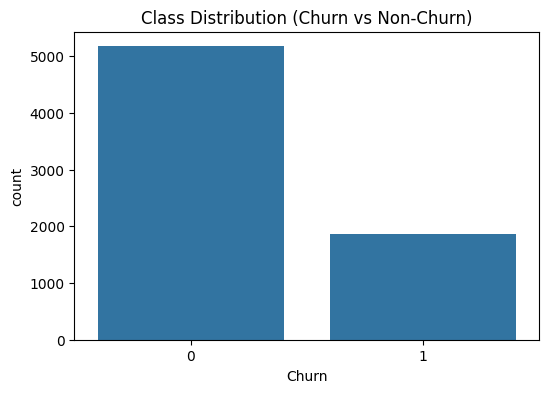

In [ ]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Class Distribution (Churn vs Non-Churn)')
plt.show()

##Distribution of Key Numerical features

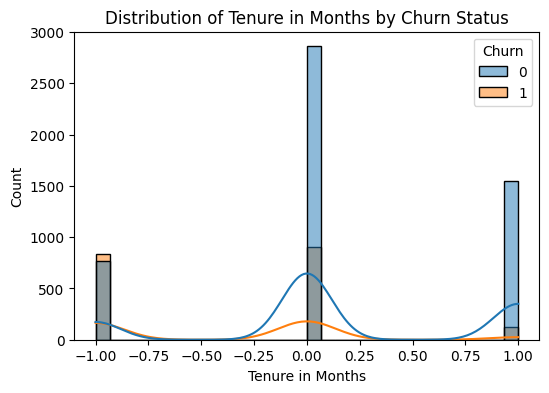

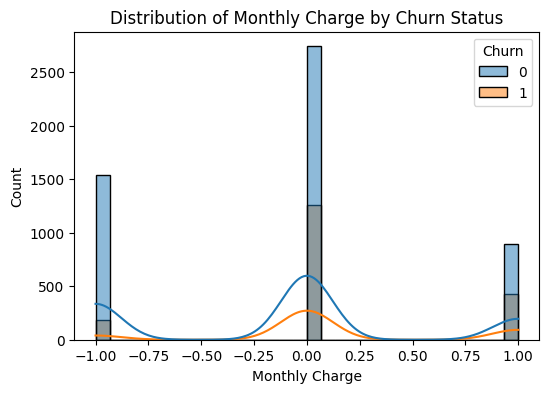

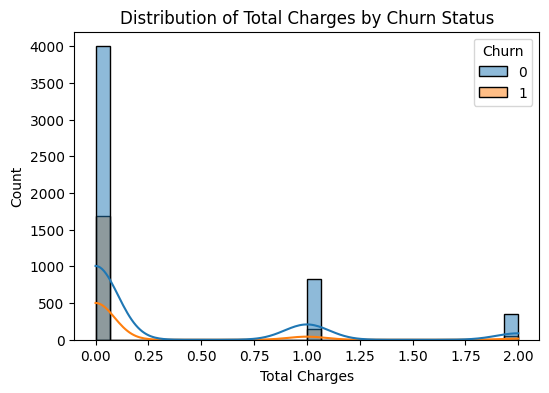

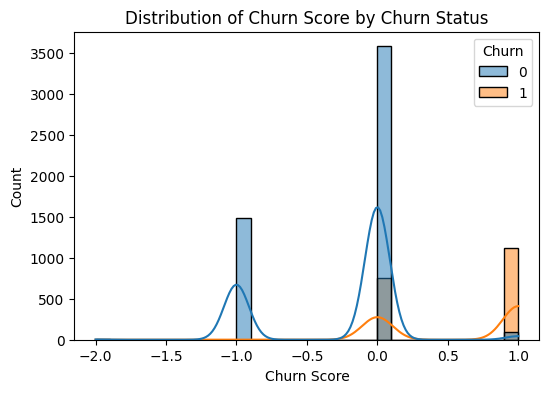

In [ ]:
# Distribution of key numerical features
num_cols = ['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Churn Score']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Churn Status')
    plt.show()

##Correlation heatmaps

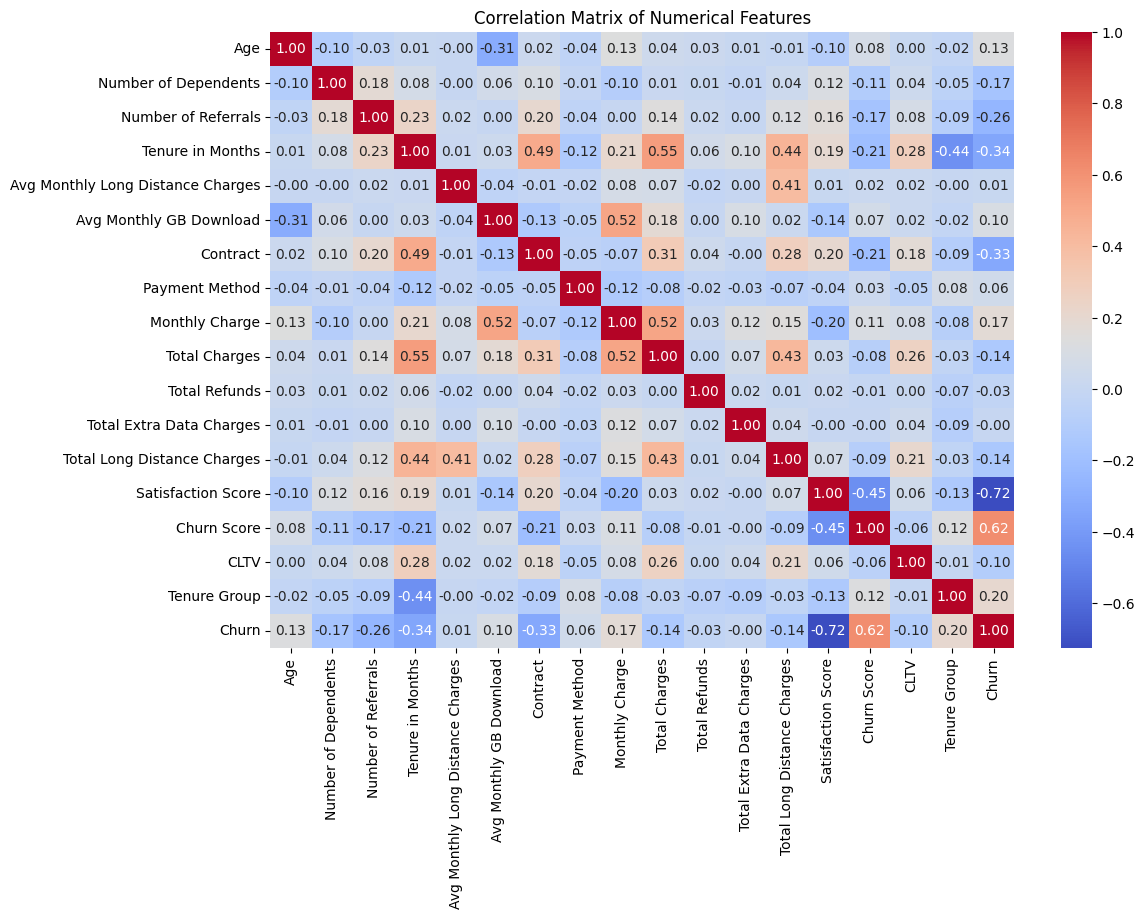

In [ ]:
#Correlation heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##Splitting the data into training and testing sets

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42)

#Algorithm Comparison

##Logistic Regression

In [ ]:
#Train with logistic regression
model = LogisticRegression()
model.fit(X_train,y_train)
y_prob = model.predict_proba(X_test)[:, 1]
#Predict on the test]
y_pred = model.predict(X_test)

##Gradient Boosting

In [ ]:
#Initialize, train and test with Gradient Boosting Classifier
learning_rates = [0.01, 0.05, 0.1, 0.2,0.5,1.0]
best_gb_auc = 0
best_gb_clf = None
best_lr = 0
for lr in learning_rates:
    gb_clf = GradientBoostingClassifier(n_estimators = 100,learning_rate=lr, max_depth=3, random_state=42)
    gb_clf.fit(X_train, y_train)
    y_pred_gb = gb_clf.predict(X_test)
    y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob_gb)
    if auc > best_gb_auc:
        best_gb_auc = auc
        best_gb_clf = gb_clf
        best_lr = lr
print(lr)

1.0


##Neural Networks MLP Classifier

In [ ]:
#Initialize, train and test Neural Network MLP Classifier
hidden_layers = (100,50,30,10)
mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=10000, random_state=42)
mlp_model.fit(X_train, y_train)
y_prob = mlp_model.predict_proba(X_test)[:, 1]
y_pred_mlp = mlp_model.predict(X_test)

###Model Evaluation

In [ ]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{model_name} Results:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    auc = roc_auc_score(y_true,y_prob)
    print(f"ROC AUC Score: {auc:.4f}")
    return auc

auc_log = evaluate_model("Logistic Regression", y_test, y_pred)
auc_gb = best_gb_auc
y_pred_gb = best_gb_clf.predict(X_test)
auc_mlp = evaluate_model("Neural Network (MLP)", y_test, y_pred)


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[1009    0]
 [   0  400]]
ROC AUC Score: 1.0000

Neural Network (MLP) Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[1009    0]
 [   0  400]]
ROC AUC Score: 1.0000


##Model comparison

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting', 'Neural Network'],
    'Accuracy': [accuracy_score(y_test, y_pred),
                accuracy_score(y_test, y_pred_gb),
                accuracy_score(y_test, y_pred_mlp)],
    'ROC AUC': [auc_log, auc_gb, auc_mlp]
})

##Model Perfomance Metrics

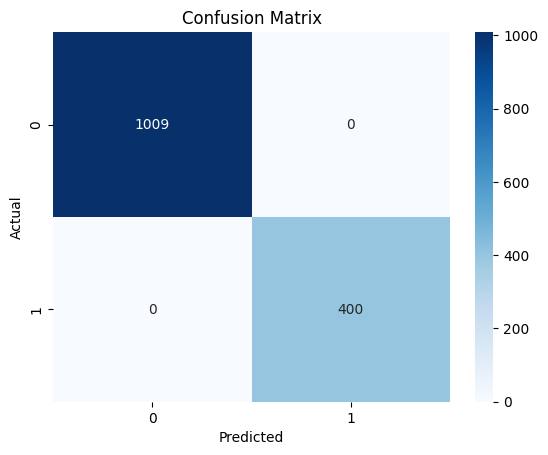

NameError: name 'roc_auc' is not defined

In [ ]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##Feature Importance

In [ ]:
# For Logistic Regression
coef_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

# For Gradient Boosting
feat_imp = pd.DataFrame({'Feature': selected_features, 'Importance': gb_model.feature_importances_})
feat_imp = feat_imp.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance (Gradient Boosting)')
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'coef_'

##Precision-Recall Tradeoff

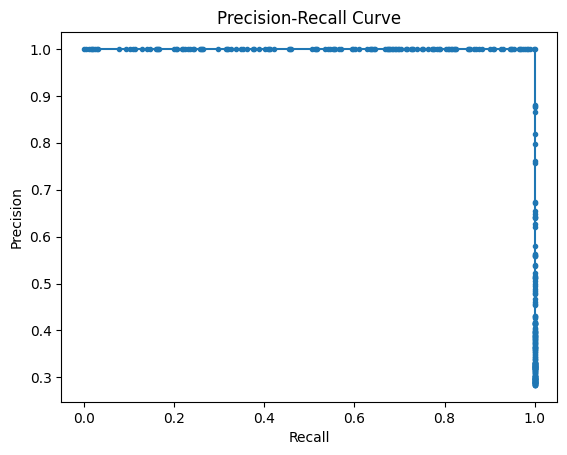

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

##Visualization

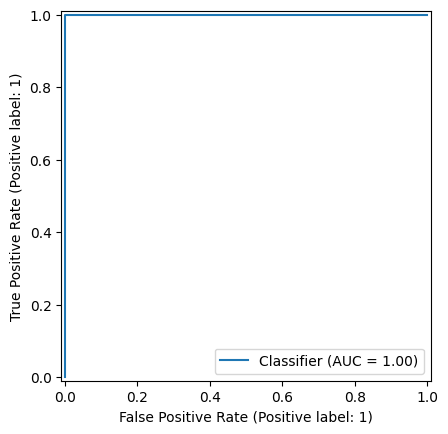

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()